In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

Null hypothesis: There are an equal number of voters who supported and didn't support the referendum.

Alternate hypothesis: There are more voters who supported the referendum than who did not.

#### Step 2: Test Statistic

Test Statistic: total sum of each observed result (support and didn't support) and the expected result under the null hypothesis

Value of Test Statistic: 30

Value Expected Under Null Hypothesis: 0

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

The test statistic should take a value of 0. The value of p should be greater than 5%.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The P-value is the probability of getting 30 or worse assuming the null hypothesis is true. If the null hypothesis is true, then then our result should be highly likely.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [2]:
#distribution of test statistic
ts = []
for i in np.arange(10000): 
    #simulate the scenario
    rs = stats.binom.rvs(200,0.5) #returns number of supporting votes
    rs2 = 200 - rs
    #test statistic
    ts = np.append(ts, abs(rs-100)+abs(rs2-100))
ts

array([ 2.,  0., 10., ..., 30.,  6.,  4.])

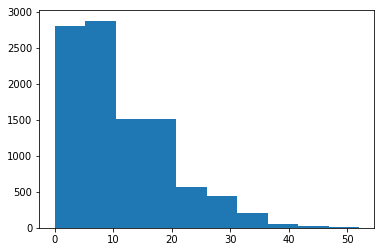

In [3]:
#plot test statistic
plt.hist(ts)
plt.show()

In [4]:
#compute p-value
p_value = np.mean(ts>30)
print('P-Value:', str(p_value))

P-Value: 0.0285


#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

The P-Value is less than 5%. This rejects the null hypothesis that there are an equal amount of supporting and non-supporting voters. If the null hypothesis was true, our result of 30 would have occured at a much higher p-vlaue. This data also supports our alternate hypothesis.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

The interal does not contain the value 0.5. This means that we are 95% confident that percent of voters that supported the referendum was more than 50%, or at least not equal to 50%. This further supports our alternate hypothesis.

In [5]:
bootstrap = stats.binom.rvs(200,115/200,size=5000)/200
left_end = percentile(2.5,bootstrap)
right_end = percentile(97.5,bootstrap)

print("95% confidence interval: [{:f}, {:f}]".format(left_end, right_end))

95% confidence interval: [0.505000, 0.645000]
